# Generating a set of Vertical component of magnetic field data for a model

Notebook to open a dictionary with the Total Field Anomaly data for a set of geometrical objects.

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism,PolygonalPrism
from fatiando.gravmag import sphere,prism, polyprism

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'synthetic_data.ipynb'

#### Plot style

In [3]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [4]:
dir_modules = '../../'
sys.path.append(dir_modules)

In [5]:
import my_package as fc

#### Loading properties of a set of geometrical objects

In [6]:
with open('data/model_rock.pickle') as f:
        model = pickle.load(f)

#### Loading the grid parameters

In [7]:
with open('data/regular_grid.pickle') as f:
        regular = pickle.load(f)

#### Constructing a dictionary

In [8]:
data_set = dict()

#### List of saved files

In [9]:
saved_files = []

## Calculating the data for Regular grid

### For regular grid

#### Observation area

In [10]:
print 'Area limits: \n x_max = %.1f $\mu m$ \n x_min = %.1f $\mu m$ \n y_max = %.1f $\mu m$ \n y_min = %.1f $\mu m$' % (regular['area'][1], regular['area'][0],regular['area'][3],regular['area'][2])

Area limits: 
 x_max = 3000.0 $\mu m$ 
 x_min = -3000.0 $\mu m$ 
 y_max = 3000.0 $\mu m$ 
 y_min = -3000.0 $\mu m$


#### Grid information

In [11]:
print 'Shape : (%.0f,%.0f)'% regular['shape'] 
print 'Number of data: %.1f' % regular['N']
print 'dx: %.1f $\mu' % regular['dx']
print 'dy: %.1f $\mu ' % regular['dy']
print 'Height: %.1f m' % regular['z_obs']

Shape : (51,51)
Number of data: 2601.0
dx: 120.0 $\mu
dy: 120.0 $\mu 
Height: -640.0 m


#### Calculation of Bz

In [12]:
data_set['bz_s'] = sphere.bz(regular['x'],regular['y'],regular['z'],model['spheres'])
data_set['bz_p'] = prism.bz(regular['x'],regular['y'],regular['z'],model['prism'])

##### Generating noise

In [13]:
np.random.seed(seed=40)
std_noise = 20.
r = np.random.normal(0.0,std_noise, regular['Nx']*regular['Ny'])

In [14]:
data_set['bz_true'] = data_set['bz_p'] + data_set['bz_s']

In [15]:
data_set['bz_obs'] = data_set['bz_true'] + r

#### Calculation of Bx

In [16]:
data_set['bx_s'] = sphere.bx(regular['x'],regular['y'],regular['z'],model['spheres'])
data_set['bx_p'] = prism.bx(regular['x'],regular['y'],regular['z'],model['prism'])

In [17]:
data_set['bx_true'] = data_set['bx_p'] + data_set['bx_s'] 

#### Calculation of By

In [18]:
data_set['by_s'] = sphere.by(regular['x'],regular['y'],regular['z'],model['spheres'])
data_set['by_p'] = prism.by(regular['x'],regular['y'],regular['z'],model['prism'])

In [19]:
data_set['by_true'] = data_set['by_p'] + data_set['by_s'] 

#### Calculation of the Amplitude of magnetic vector

In [20]:
data_set['B_true'] = np.sqrt(data_set['bx_true']*data_set['bx_true'] + 
                             data_set['by_true']*data_set['by_true'] + 
                             data_set['bz_true']*data_set['bz_true'])

## Visualization of bz-component

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


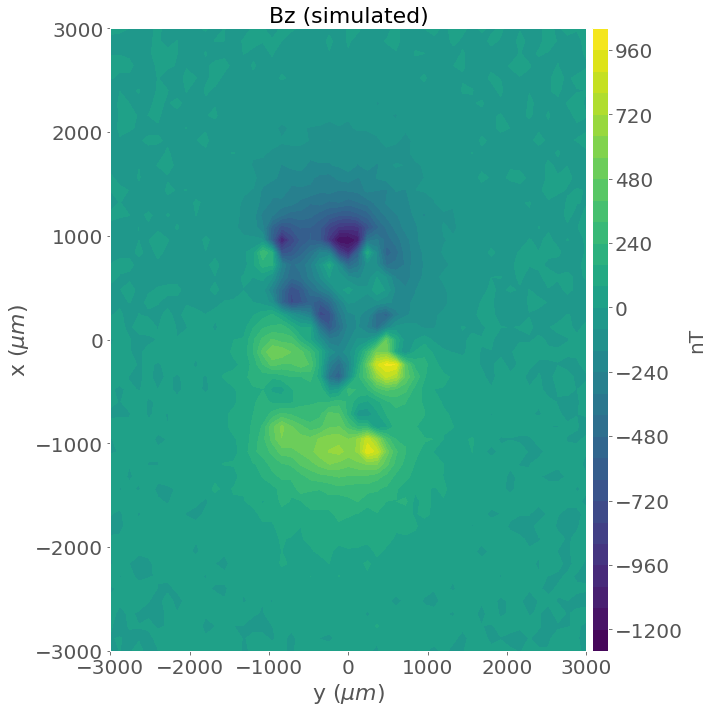

In [21]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.xlabel('y ($\mu m$)', fontsize = title_font)
plt.ylabel('x ($\mu m$)', fontsize = title_font)
plt.title('Bz (simulated)', fontsize=title_font)
plt.contourf(regular['y'].reshape(regular['shape']), 
             regular['x'].reshape(regular['shape']),
             data_set['bz_obs'].reshape(regular['shape']),30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/noisy_bz_sample'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

## Visualization of bx-component

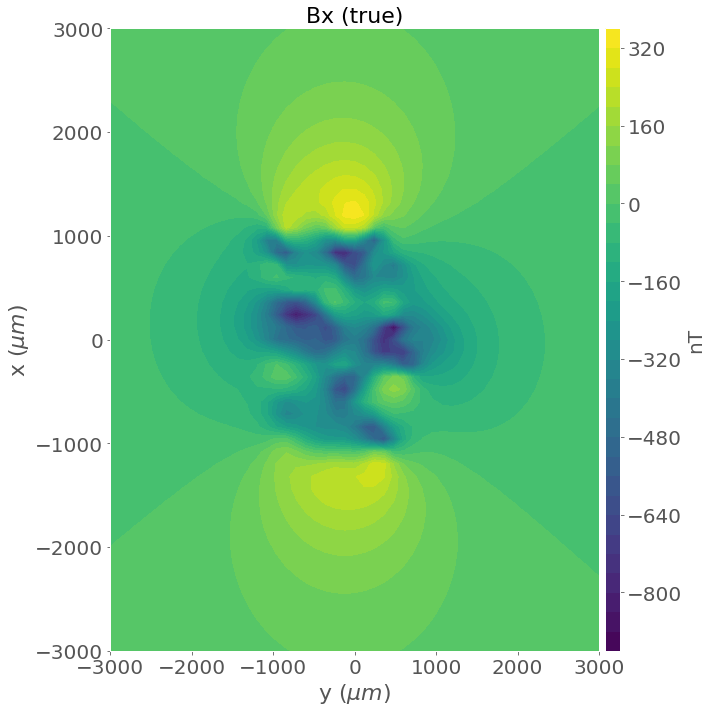

In [22]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.xlabel('y ($\mu m$)', fontsize = title_font)
plt.ylabel('x ($\mu m$)', fontsize = title_font)
plt.title('Bx (true)', fontsize=title_font)
plt.contourf(regular['y'].reshape(regular['shape']), 
             regular['x'].reshape(regular['shape']),
             data_set['bx_true'].reshape(regular['shape']),30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/bx_sample_true'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

#### Visualization of by-component

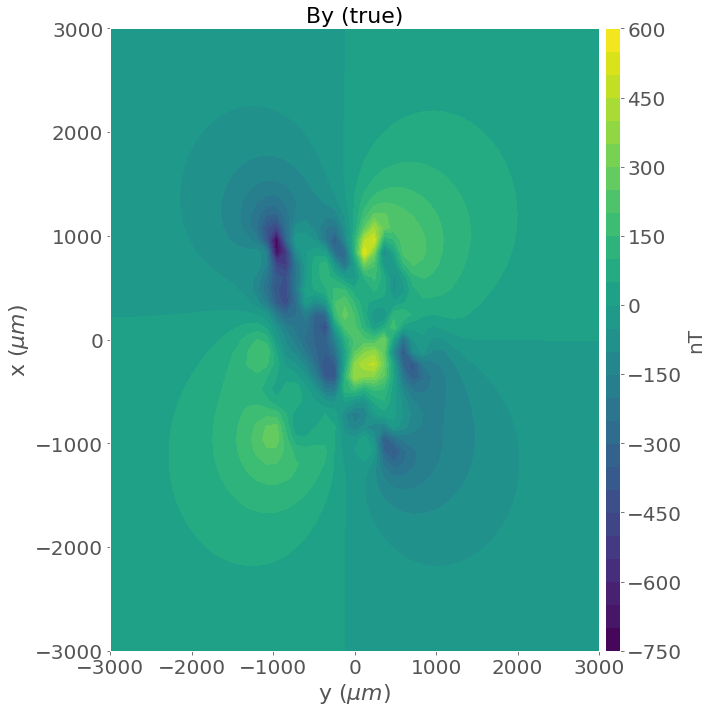

In [23]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.xlabel('y ($\mu m$)', fontsize = title_font)
plt.ylabel('x ($\mu m$)', fontsize = title_font)
plt.title('By (true)', fontsize=title_font)
plt.contourf(regular['y'].reshape(regular['shape']), 
             regular['x'].reshape(regular['shape']),
             data_set['by_true'].reshape(regular['shape']),30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/by_sample_true'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### Visualization of Amplitude of magnetic vector

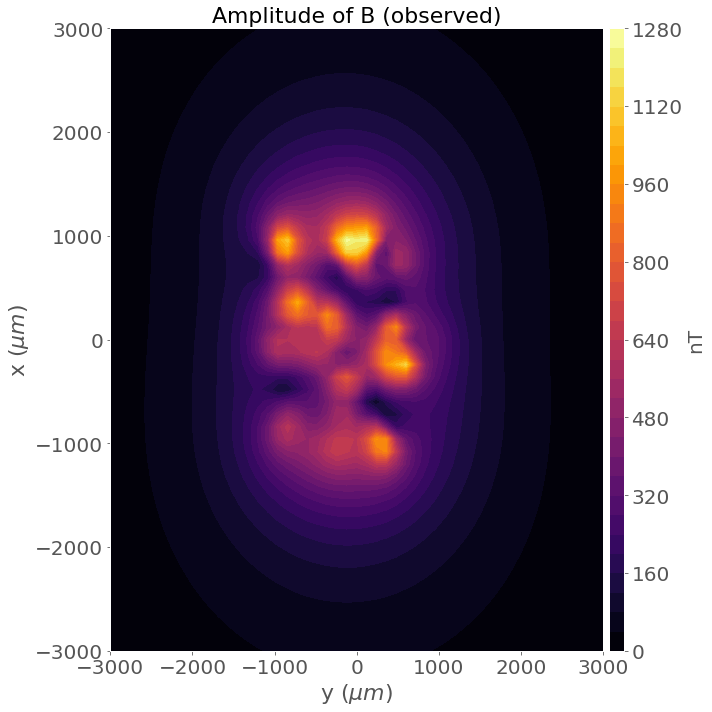

In [24]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.xlabel('y ($\mu m$)', fontsize = title_font)
plt.ylabel('x ($\mu m$)', fontsize = title_font)
plt.title('Amplitude of B (observed)', fontsize=title_font)
plt.contourf(regular['y'].reshape(regular['shape']), 
             regular['x'].reshape(regular['shape']),
             data_set['B_true'].reshape(regular['shape']),30, cmap='inferno')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


file_name = 'figs/B_sample_true'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

#### Generating .pickle file

In [25]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [26]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)


## Saved files

In [27]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/noisy_bz_sample.png
2  figs/bx_sample_true.png
3  figs/by_sample_true.png
4  figs/B_sample_true.png
5  data/data_set.pickle
